# Run some examples in OpenOA

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import operational_analysis
operational_analysis.__file__, operational_analysis.__version__

('/Users/jperrsau/cu-src/appm5650/project/OpenOA/operational_analysis/__init__.py',
 '2.2')

In [3]:
import sys
sys.path.append("./OpenOA/examples")

In [4]:
from project_ENGIE import Project_Engie

In [5]:
project = Project_Engie('./OpenOA/examples/data/la_haute_borne')

In [6]:
project.prepare()

INFO:project_ENGIE:Loading SCADA data
INFO:operational_analysis.types.timeseries_table:Loading name:la-haute-borne-data-2014-2015
INFO:project_ENGIE:SCADA data loaded
INFO:project_ENGIE:Timestamp QC and conversion to UTC
INFO:project_ENGIE:Correcting for out of range of temperature variables
INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:project_ENGIE:Flagging unresponsive sensors
INFO:project_ENGIE:Converting field names to IEC 61400-25 standard
INFO:operational_analysis.types.timeseries_table:Loading name:plant_data
INFO:operational_analysis.types.timeseries_table:Loading name:plant_data
INFO:operational_analysis.types.timeseries_table:Loading name:merra2_la_haute_borne
INFO:operational_analysis.types.timeseries_table:Loading name:era5_wind_la_haute_borne


In [7]:
from operational_analysis.methods import plant_analysis

In [52]:
pa = plant_analysis.MonteCarloAEP(project, reanal_products = ['era5', 'merra2'], regression_frac=1.0, qmc=True)

INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


In [62]:

pa.run(num_sim=128, reanal_subset=['era5', 'merra2'])

INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}
100%|██████████| 128/128 [00:01<00:00, 99.26it/s] 
INFO:operational_analysis.methods.plant_analysis:Run completed


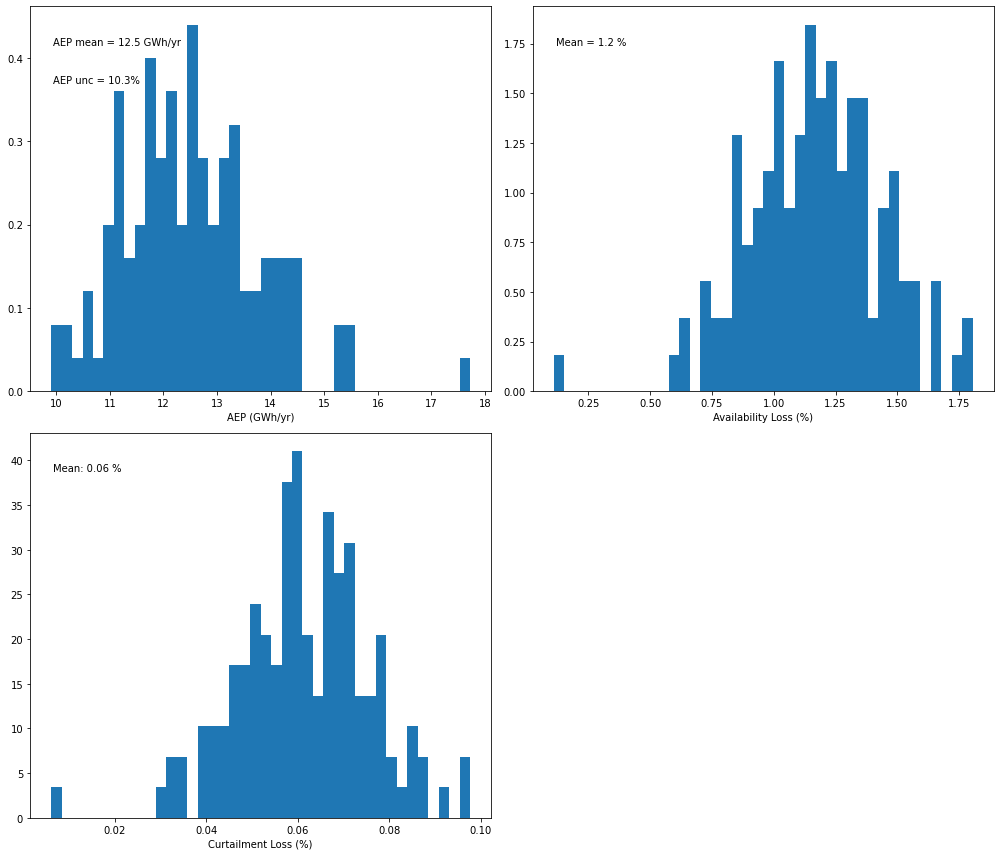

In [56]:
pa.plot_result_aep_distributions().show()

In [60]:
pa.results["aep_GWh"].mean()

12.517606923268485

In [61]:
pa.results["aep_GWh"].std()

1.2948930780178523